In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
import pickle
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Datadirectory = "/content/drive/MyDrive/CK+48"
Classes = ["0", "1", "2", "3", "4", "5", "6"]

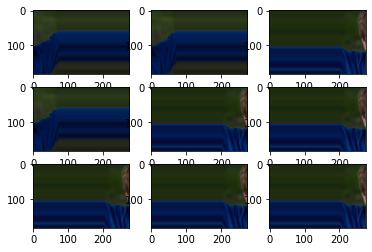

In [ ]:

# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/drive/MyDrive/HAPPY1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

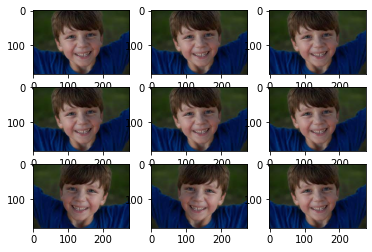

In [ ]:

# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/drive/MyDrive/HAPPY1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

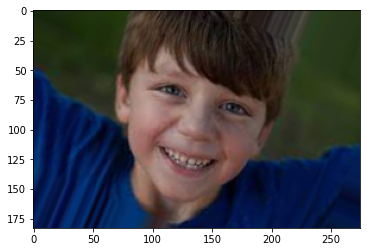

"# generate samples and plot\nfor i in range(9):\n\t# define subplot\n\tpyplot.subplot(330 + 1 + i)\n\t# generate batch of images\n\tbatch = it.next()\n\t# convert to unsigned integers for viewing\n\timage = batch[0].astype('uint8')\n\t# plot raw pixel data\n\tpyplot.imshow(image)\n# show the figure\npyplot.show()"

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/drive/MyDrive/HAPPY1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=30)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
batch = it.next()
image = batch[0].astype('uint8')
pyplot.imshow(image)
pyplot.show()

"""# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()"""

In [ ]:
Data = []
img_size = 224
datagen = ImageDataGenerator(rotation_range=30)

def create_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        count = 0
        for img in os.listdir(path):
            
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                Data.append([new_array, class_num])

                #print("hello")
                try:
                  samples = expand_dims(img_array, 0)
                  it = datagen.flow(samples, batch_size=1)

                #print(it)
                except Exception as e:
                  print(e)
                for i in range(3):
                  batch = it.next()
                  aug_image = batch[0].astype('uint8')
                  aug_arr = cv2.resize(aug_image, (img_size, img_size))
                  # pyplot.imshow(aug_image)
                  # pyplot.show()
                  # # print(aug_arr)
                  # # plt.imshow(aug_arr)
                  # # print("hellloo")
                  # break
                  Data.append([aug_arr, class_num])
            except Exception as e:
                pass

In [ ]:
create_Data()

In [ ]:
len(Data)

3924

In [ ]:
import random

random.shuffle(Data)

X = []
y = []

for features, label in Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)
X = X/255.0
Y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
del X
del Y
del Data

NameError: ignored

In [ ]:
import tensorflow as tf
model = tf.keras.applications.MobileNetV2()

base_input = model.layers[0].input
base_output = model.layers[-2].output

from tensorflow import keras
from tensorflow.keras import layers

final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output)

new_model = keras.Model(inputs = base_input, outputs = final_output)

for layer in new_model.layers:
	layer.trainable = False

new_model.get_layer('dense').trainable = True
new_model.get_layer('activation').trainable = True
new_model.get_layer('dense_1').trainable = True
new_model.get_layer('activation_1').trainable = True
new_model.get_layer('dense_2').trainable = True

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [ ]:
history = new_model.fit(X_train, y_train,
                    epochs = 25, validation_data =(X_test, y_test))

Epoch 1/25
75/99 [=====================>........] - ETA: 18s - loss: 0.9781 - accuracy: 0.6596

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored